In [1]:
import sys
if '..' not in sys.path:
    sys.path.append('..')

In [2]:
import tensorflow as tf
from ultrayolo import datasets, YoloV3
from ultrayolo.helpers import draw
from pathlib import Path
import numpy as np

from matplotlib import patches
import matplotlib.pyplot as plt

# Predict using default Yolo Model

The classes contained in the dataset

In [3]:
classes_dict = datasets.load_classes('./coco_classes.txt', True)
target_shape = (1024, 1024, 3)
max_objects = 100
num_classes = len(classes_dict)
print(f'number of classes {num_classes}')

number of classes 80


In [4]:
model = YoloV3(target_shape, max_objects,
               num_classes=num_classes, score_threshold=0.3, iou_threshold=0.5, training=False)

## Load the weights

load default weights from [Yolo](https://pjreddie.com/darknet/yolo/)

!wget https://pjreddie.com/media/files/yolov3.weights

In [5]:
w_path = Path('./yolov3.weights')
model.load_weights(w_path)

18020 MainThread loading checkpoint from /Users/fumarolaf/git/ultrayolo/notebooks/yolov3.weights
 18022 MainThread version major 0, minor 2, revision 0, seen 32013312


## Predict

we predict the objects using an image from the web. You can try with your.

### Download an image

In [6]:
img = datasets.open_image('https://c8.staticflickr.com/4/3901/14855908765_8bdda9130b_z.jpg')
img_pad = datasets.pad_to_fixed_size(img, target_shape)
img_resized = datasets.resize(img, target_shape)
#preprocess the image
x = np.divide(img_pad, 255.)
x = np.expand_dims(x, 0)
x.shape

(1, 1024, 1024, 3)

### Perform the prediction

In [7]:
boxes, scores, classes, sel = model.predict(x)
print(f'found {sel[0]} objects')

found 12 objects


Uncomment the cells below to see what the model returns

### Show the image with the discovered objects

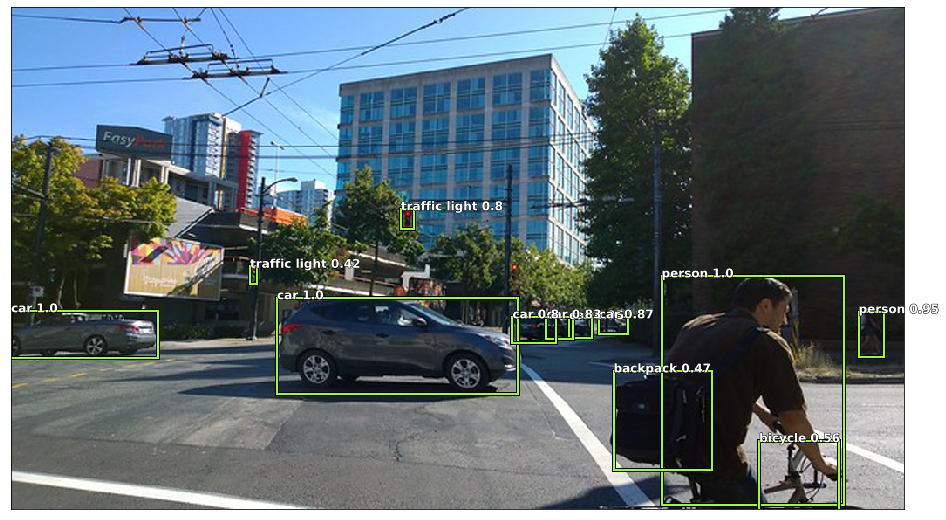

In [8]:
ax = draw.show_img(img_resized, figsize=(16,10))
for i,b in enumerate(boxes[0,:sel[0]]):
    draw.rect(ax, b, color='#9cff1d')
    name_score = f'{classes_dict[classes[0, i]]} {str(round(scores[0,i],2))}'
    draw.text(ax, b[:2], name_score, sz=12)
    #print(classes_dict[classes[0, i]], scores[0,i])
    
plt.show()